In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherHistory.csv', parse_dates=["Formatted Date"])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


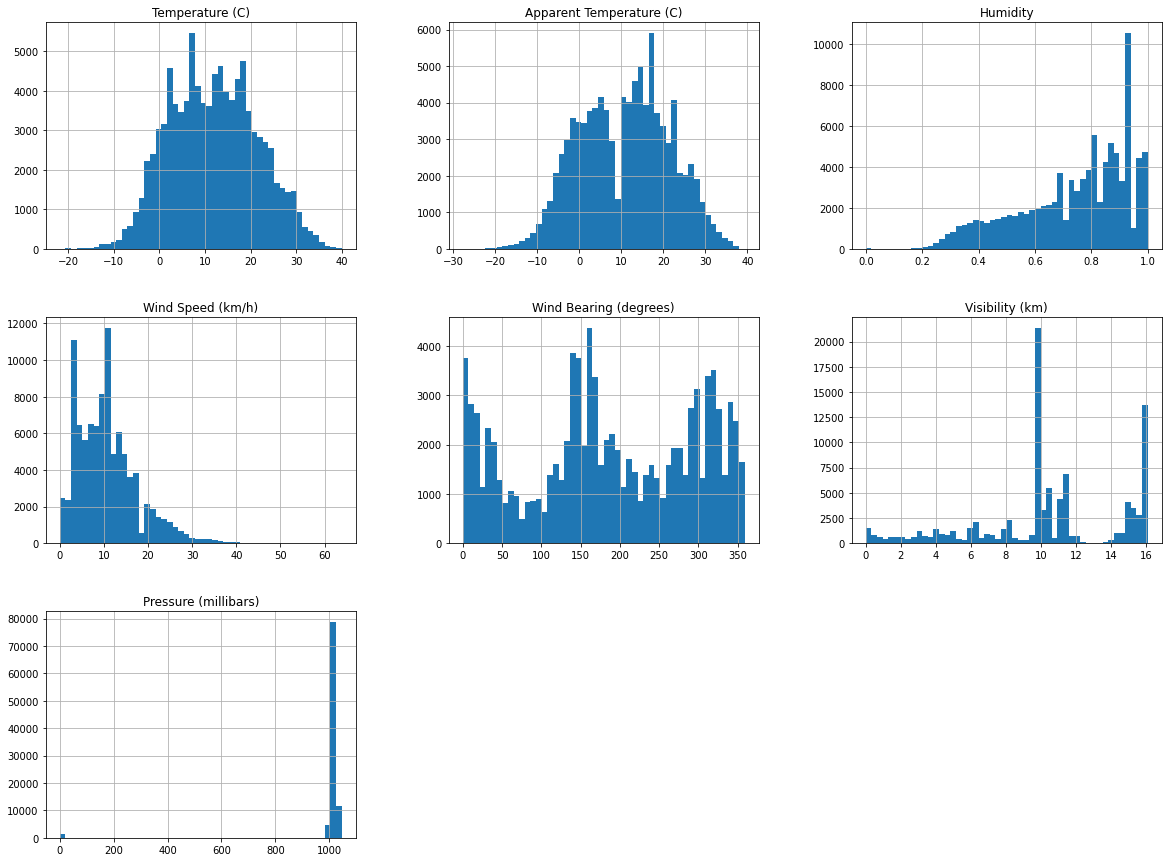

In [5]:
attributes = df.drop("Loud Cover", axis=1).columns
df[attributes].hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# odrzucenie niepotrzebnych kolumn
to_drop = ["Formatted Date", "Summary", "Daily Summary", "Loud Cover"]
df.drop(columns=to_drop, inplace=True)

# ujednolicenie typów danych
df["Precip Type"].fillna("none", inplace=True)  # w tej kolumnie są wartości rain, snow, nan -> zmieniamy nan na string "none" oznaczający brak opadów
df["Precip Type"] = df["Precip Type"].astype("category") # zmiana typu danych na typ category w celu redukcji wielkosci dataframe

In [7]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [8]:
# sprawdzenie korelacji między atrybutami
corr_matrix = df.corr()
corr_matrix["Apparent Temperature (C)"].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992629
Visibility (km)             0.381718
Wind Bearing (degrees)      0.029031
Pressure (millibars)       -0.000219
Wind Speed (km/h)          -0.056650
Humidity                   -0.602571
Name: Apparent Temperature (C), dtype: float64

<AxesSubplot:>

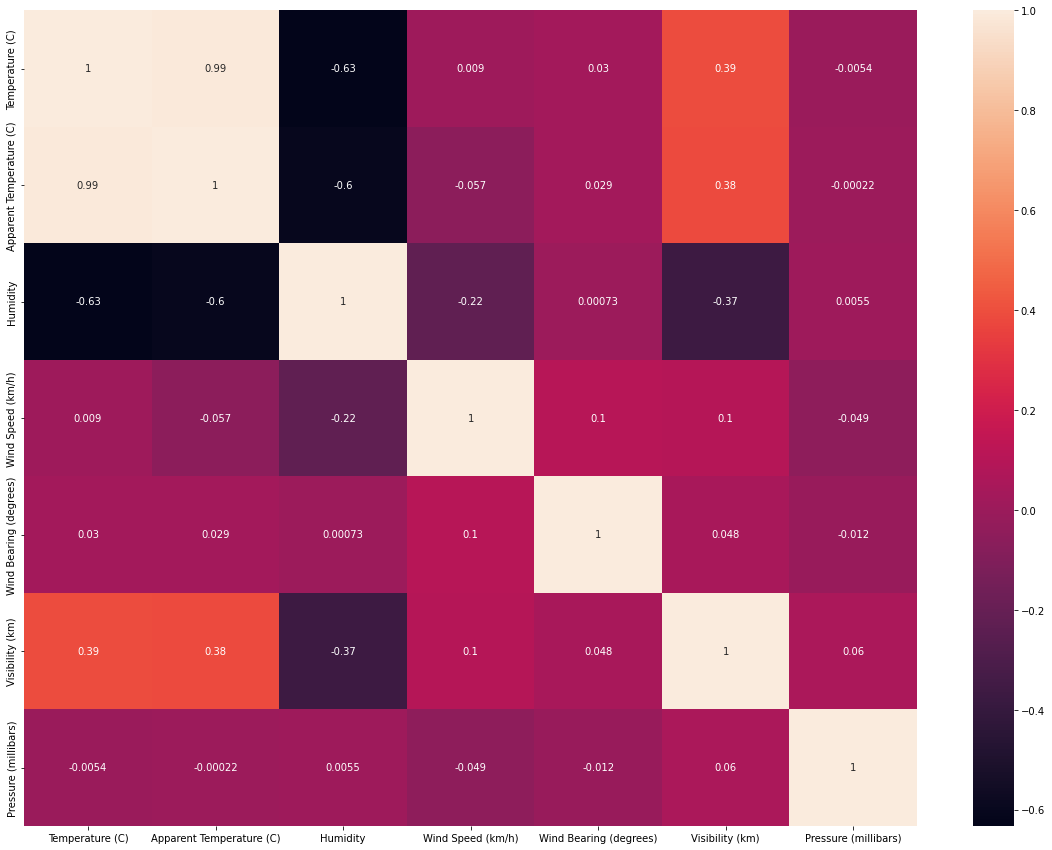

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)

In [10]:
# odrzucenie kolejnych atrybutów po sprawdzeniu korelacji
df.drop(columns=["Wind Bearing (degrees)", "Pressure (millibars)"], inplace=True)

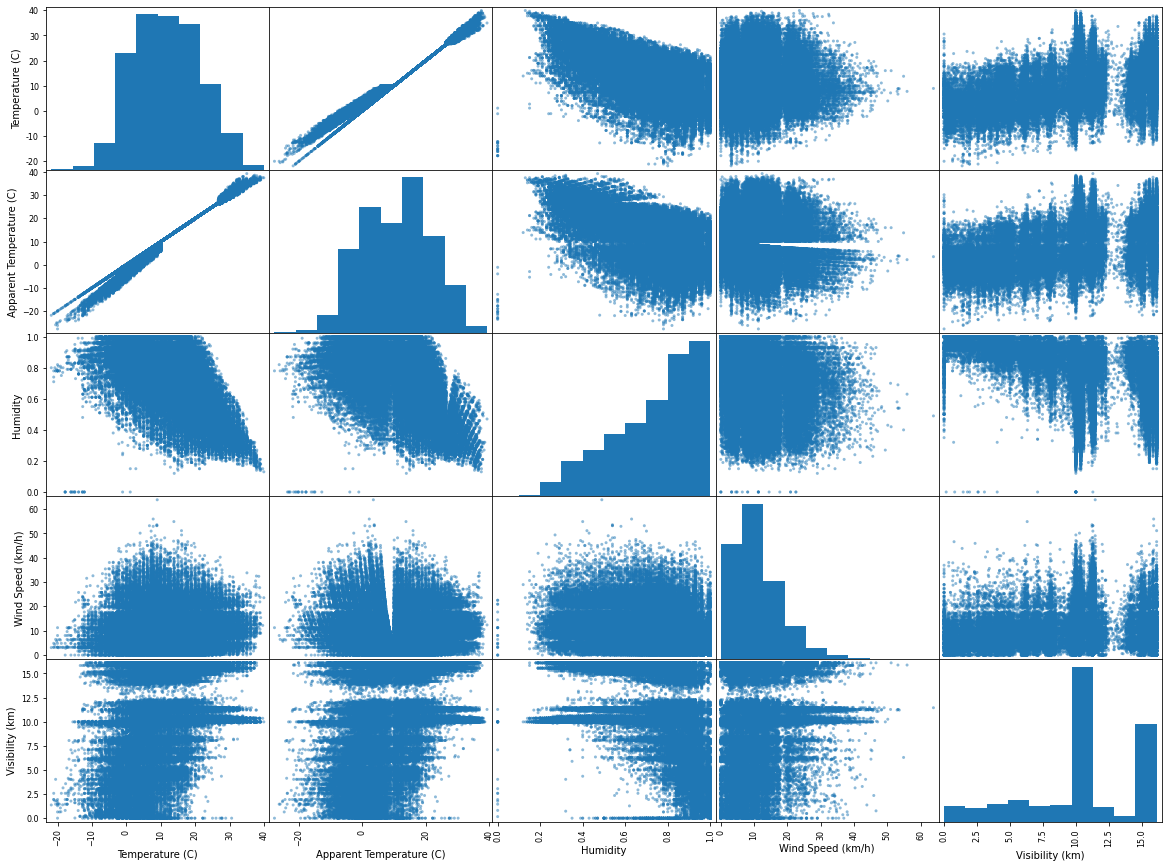

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,15))
plt.show()

z odczuwalną temperaturą najsilniej skorelowane są: temperatura zmierzona, widoczność i wilgotność

## Machine learning - let's GOOOO

In [12]:
# select target and features
target = "Apparent Temperature (C)"
features = ["Temperature (C)", "Humidity", "Precip Type"]  # 2 numeric and 1 categorical predictors

X = df[features].copy()
y = df[target].copy()

In [13]:
# split to train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
# zaciągam potrzebne biblioteki
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

notatka:  
w zmiennych numerycznych, nie ma brakujących wartości, więc dla tych danych wykonam tylko skalowanie  
w zmiennych kategorycznych nie brakuje wartosci, bo wszystkie nan zostaly potraktowane jako brak opadów w danym dataset, więc wykonuje tylko ohe

In [16]:
# podział na atrybuty numeryczne i kategoryczne
num_attr = X.select_dtypes(include="number").columns
cat_attr = X.select_dtypes(exclude="number").columns

In [17]:
# pipeline dla zmiennych numerycznych
num_pipeline = Pipeline(
    [
        ("std_scaler", StandardScaler()),
    ]
)

# pipeline dla zmiennych kategorycznych
cat_pipeline = Pipeline(
    [
        ("ohe", OneHotEncoder()),
    ]
)

# pipeline dla zmiennych numerycznych i kategorycznych
full_pipeline = ColumnTransformer(
    [
        ("num_pip", num_pipeline, num_attr),
        ("cat_pip", cat_pipeline, cat_attr),
    ]
)

# full pipeline dla modelu liniowego 
lin_reg_model_pipeline = Pipeline(
    [
        ("full_pip", full_pipeline),
        ("model", LinearRegression())
    ]
)

# full pipeline dla modelu wielomianowego
poly_reg_model_pipeline = Pipeline(
    [
        ("full_pip", full_pipeline),
        ("poly_trans", PolynomialFeatures()),
        ("model", LinearRegression())
    ]
)

dec_tree_model_pipeline = Pipeline(
    [
        ("full_pip", full_pipeline),
        ("model", DecisionTreeRegressor(random_state=42))
    ]
)

In [18]:
# predykcje modelu liniowego 
lin_reg_model_pipeline.fit(X_train, y_train)
y_pred_lr = lin_reg_model_pipeline.predict(X_test)

In [19]:
# predykcje modelu wielomianowego
poly_reg_model_pipeline.fit(X_train, y_train)
y_pred_plr = poly_reg_model_pipeline.predict(X_test)

In [20]:
# predykcje modelu drzewa decyzyjnego
dec_tree_model_pipeline.fit(X_train, y_train)
y_pred_dt = dec_tree_model_pipeline.predict(X_test)

In [21]:
print(dec_tree_model_pipeline[1].get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [22]:
from sklearn.metrics import mean_squared_error

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=True)
rmse_plr = mean_squared_error(y_test, y_pred_plr, squared=True)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=True)

print("RMSE for models with default hiperparameters")
print(f"linear model rmse:     {rmse_lr:.5f}")
print(f"polynomial model rmse: {rmse_plr:.5f}, degree: {poly_reg_model_pipeline.steps[1][1].degree}")
print(f"dec. tree model rmse:  {rmse_dt:.5f}, depth: {dec_tree_model_pipeline[1].get_depth()}, leafs: {dec_tree_model_pipeline[1].get_n_leaves()}")

RMSE for models with default hiperparameters
linear model rmse:     1.55167
polynomial model rmse: 1.30637, degree: 2
dec. tree model rmse:  1.68986, depth: 36, leafs: 30406


### Fine tuning with GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

poly_grid_params = [
    {
        "poly_trans__degree" : np.arange(1,5)  # chce sprawdzic dla [1,2,3,4] stopni swobody
    }
]

dt_grid_params = [
    {
        "model__max_depth" : np.arange(2,11),
        "model__max_leaf_nodes" : [10,20,30,40,50]
    }
]

In [24]:
# grid search dla polynominal regressor
grid_search_plr = GridSearchCV(poly_reg_model_pipeline, poly_grid_params, cv=5, verbose=0, scoring="neg_root_mean_squared_error")
grid_search_plr.fit(X_train, y_train)
pd.DataFrame(grid_search_plr.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly_trans__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.346820,0.016638,0.010466,0.002725,4,{'poly_trans__degree': 4},-1.082251,-1.094725,-1.082886,-1.071248,-1.086822,-1.083587,0.007604,1
2,0.184897,0.011674,0.008319,0.003444,3,{'poly_trans__degree': 3},-1.117884,-1.127267,-1.117451,-1.101262,-1.123161,-1.117405,0.008845,2
1,0.076477,0.018507,0.007942,0.004101,2,{'poly_trans__degree': 2},-1.140742,-1.152272,-1.144973,-1.135698,-1.149179,-1.144573,0.005901,3
0,0.031647,0.010751,0.007884,0.006913,1,{'poly_trans__degree': 1},-1.241554,-1.262760,-1.255086,-1.236164,-1.254812,-1.250075,0.009742,4


In [25]:
# grid search dla decision tree regressor
grid_search_dt = GridSearchCV(dec_tree_model_pipeline, dt_grid_params, cv=5, verbose=0, scoring="neg_root_mean_squared_error")
grid_search_dt.fit(X_train, y_train)
pd.DataFrame(grid_search_dt.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,3.480509,0.032889,0.004391,0.000448,10,50,"{'model__max_depth': 10, 'model__max_leaf_node...",-1.124653,-1.138565,-1.121977,-1.123267,-1.135992,-1.128891,0.006948,1
39,3.422369,0.004616,0.004192,0.000105,9,50,"{'model__max_depth': 9, 'model__max_leaf_nodes...",-1.124653,-1.138565,-1.121977,-1.123267,-1.135992,-1.128891,0.006948,1
34,3.555880,0.128625,0.004630,0.001040,8,50,"{'model__max_depth': 8, 'model__max_leaf_nodes...",-1.124653,-1.138565,-1.121977,-1.123267,-1.135992,-1.128891,0.006948,1
29,3.408387,0.005873,0.003914,0.000089,7,50,"{'model__max_depth': 7, 'model__max_leaf_nodes...",-1.124653,-1.138565,-1.121977,-1.123267,-1.135992,-1.128891,0.006948,1
24,3.399300,0.026127,0.003997,0.000106,6,50,"{'model__max_depth': 6, 'model__max_leaf_nodes...",-1.128231,-1.137137,-1.125729,-1.123310,-1.133342,-1.129550,0.005044,5


In [26]:
print("optymalny stopien swobody w zadanym zakresie")
print(grid_search_plr.best_params_)

print("optymalne parametry drzewa w zadanym zakresie")
print(grid_search_dt.best_params_)


optymalny stopien swobody w zadanym zakresie
{'poly_trans__degree': 4}
optymalne parametry drzewa w zadanym zakresie
{'model__max_depth': 7, 'model__max_leaf_nodes': 50}


In [27]:
y_pred_plr_2 = grid_search_plr.best_estimator_.predict(X_test)
y_pred_dt_2 = grid_search_dt.best_estimator_.predict(X_test)

rmse_plr_2 = mean_squared_error(y_test, y_pred_plr_2, squared=True)
rmse_dt_2 = mean_squared_error(y_test, y_pred_dt_2, squared=True)

print(f"polynomial model 2 rmse: {rmse_plr_2:.5f}, degree: {grid_search_plr.best_params_['poly_trans__degree']}")
print(f"dec. tree model 2 rmse:  {rmse_dt_2:.5f}, depth: {grid_search_dt.best_params_['model__max_depth']}, leafs: {grid_search_dt.best_params_['model__max_leaf_nodes']}")

polynomial model 2 rmse: 1.17013, degree: 4
dec. tree model 2 rmse:  1.26253, depth: 7, leafs: 50


## jeden pipeline z kilkoma modelami:

In [37]:
# pipline do trenowania kilku modeli
model_pipeline = Pipeline(
    [
        ("full_pip", full_pipeline),
        ("poly_trans", PolynomialFeatures()),
        ("model", (LinearRegression(), ))
    ]
)

grid_params = [
    {
        "poly_trans__degree" : (1,2,3,4),
        "model": (LinearRegression(), )
    },
    {
        "poly_trans__degree" : (1, ),
        "model": (DecisionTreeRegressor(), ),
        "model__max_depth" : (10, 20, 30),
        "model__max_leaf_nodes" : (50, 60, 70)
    }
]

grid_search = GridSearchCV(model_pipeline, grid_params, cv=5, verbose=0, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pip',
                                        ColumnTransformer(transformers=[('num_pip',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Temperature (C)', 'Humidity'], dtype='object')),
                                                                        ('cat_pip',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         Index(['Precip Type'], dtype='object'))])),
                                       ('poly_trans', PolynomialFeatures()),
                                       ('model', (LinearRegression(),))]),
             param_grid=[{'model': (LinearRegression(),),
                          'poly_trans__degree': (1,)},
                         {'model': (LinearRegression(),),
                          'poly_trans__degree': (2, 3, 4)},
                         {'model': (DecisionTreeRegressor(),),
                          'model__max_depth': (10, 20, 30),
                          'model__max_leaf_nodes': (50, 60, 70),
                          'poly_trans__degree': (1,)}],
             scoring='neg_root_mean_squared_error')

In [47]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_poly_trans__degree,param_model__max_depth,param_model__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.341999,0.017569,0.009114,0.000248,LinearRegression(),4,NaN,NaN,"{'model': LinearRegression(), 'poly_trans__deg...",-1.082251,-1.094725,-1.082886,-1.071248,-1.086822,-1.083587,0.007604,1
6,4.634218,0.008223,0.004187,0.000054,DecisionTreeRegressor(),1,10,70,"{'model': DecisionTreeRegressor(), 'model__max...",-1.089337,-1.103706,-1.092087,-1.078437,-1.100596,-1.092833,0.008928,2
9,4.675646,0.005055,0.004377,0.000143,DecisionTreeRegressor(),1,20,70,"{'model': DecisionTreeRegressor(), 'model__max...",-1.089337,-1.103706,-1.092087,-1.078437,-1.100596,-1.092833,0.008928,2
12,4.692929,0.004850,0.004376,0.000088,DecisionTreeRegressor(),1,30,70,"{'model': DecisionTreeRegressor(), 'model__max...",-1.089337,-1.103706,-1.092087,-1.078437,-1.100596,-1.092833,0.008928,2
5,4.614473,0.012147,0.004214,0.000067,DecisionTreeRegressor(),1,10,60,"{'model': DecisionTreeRegressor(), 'model__max...",-1.101084,-1.116544,-1.104928,-1.097430,-1.113738,-1.106745,0.007308,5
